```
     _                                     ____             _       _   ____                                    
    / \   _ __ ___   __ _ _______  _ __   / ___|  ___   ___(_) __ _| | |  _ \ _ __ ___   __ _ _ __ ___  ___ ___ 
   / _ \ | '_ ` _ \ / _` |_  / _ \| '_ \  \___ \ / _ \ / __| |/ _` | | | |_) | '__/ _ \ / _` | '__/ _ \/ __/ __|
  / ___ \| | | | | | (_| |/ / (_) | | | |  ___) | (_) | (__| | (_| | | |  __/| | | (_) | (_| | | |  __/\__ \__ \
 /_/   \_\_| |_| |_|\__,_/___\___/|_| |_| |____/ \___/ \___|_|\__,_|_| |_|   |_|  \___/ \__, |_|  \___||___/___/
                                                                                        |___/                   
```


### Module
Data Exploration

### Goal
Exploring the data by visualization tools.

### Tools
1. Pandas
1. Matplotlib
2. Seaborn

### Requirement
1. File Definition
2. Data Preparation
3. hotspot_spi.csv generated
 
### Data Source
__${WORKDIR}__/data/ouptut/hotspot_spi.csv


In [1]:
import os
import math

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Constants

In [2]:
WORKDIR = os.path.abspath(os.getcwd())
YEARS_AVAILABLE = [2014, 2018, 2021]

## Get the data

__Load into Pandas DataFrame__

In [3]:
file = ''.join([WORKDIR, "/data/output/hotspot_spi.csv"]) 
dataset = pd.read_csv(file)
dataset.head()

,ano,estado,municipio,diasemchuva,precipitacao,riscofogo,frp,fococalor,indrisco,indriscocat,...,Gravidez na infância e adolescência,Trabalho Infantil,Vulnerabilidade familiar,Violência contra indígenas,Violência contra indígenas Taxa,Violência contra mulheres,Violência infantil,Violência infantil Taxa,Empregos ensino superior,Mulheres com empregos ensino superior
0,2014,ACRE,ACRELANDIA,0.9,0.38,0.23,0.0,441,106.21,Q3,...,26.77,288.91,12.27,0.00,1.0,29.60,22.32,2.0,13.81,7.35
1,2014,ACRE,ASSIS BRASIL,1.7,0.46,0.15,0.0,327,52.17,Q2,...,36.22,201.25,17.35,1.88,2.0,58.91,80.48,3.0,8.17,4.54
2,2014,ACRE,BRASILEIA,1.4,0.36,0.19,0.0,1120,222.50,Q3,...,31.08,144.83,20.11,40.00,5.0,300.00,683.19,5.0,9.97,6.59
3,2014,ACRE,BUJARI,0.8,0.36,0.12,0.0,339,44.49,Q2,...,34.30,824.47,16.12,0.00,1.0,45.11,32.66,2.0,12.97,9.16
4,2014,ACRE,CAPIXABA,0.8,0.10,0.08,0.0,455,42.85,Q2,...,32.05,172.42,26.07,0.00,1.0,0.00,0.00,1.0,11.60,7.08


## Visualize the data

### Get top cities risk fire

In [4]:
def get_top_hotspot(dataset, head=10, ascending=True): 
    df = dataset.copy()
    df["regiao"] = df[['municipio', 'estado']].agg(' - '.join, axis=1)
    group = df.groupby("regiao")
    return group['indrisco'].sum().sort_values(ascending=ascending)[:head]


def get_top_hotspot(dataset, head=10, ascending=True): 
    df = dataset.copy()
    df["regiao"] = df[['municipio', 'estado']].agg(' - '.join, axis=1)
    group = df.groupby("regiao")
    return group['indrisco'].sum().sort_values(ascending=ascending)[:head]


def get_max_hotspot(dataset, year):
    max_hotspot = dataset[(dataset["ano"] == year)]["indrisco"].max()
    return dataset[(dataset["ano"] == year) & (dataset["indrisco"] == max_hotspot)]


def get_min_hotspot(dataset, year):
    min_hotspot = dataset[(dataset["ano"] == year)]["indrisco"].min()
    return dataset[(dataset["ano"] == year) & (dataset["indrisco"] == min_hotspot)]


def plot_top_hotspot(dataset, how_many=10, ascending=True):
    cols = 3
    rows = math.ceil(len(YEARS_AVAILABLE) / cols)
    
    fig, axes = plt.subplots(rows, cols, figsize=(25, 5), constrained_layout=True)

    title = "Cities with {} hotspots per year".format("Fewer" if ascending else "Biggest")
    fig.suptitle(title, fontsize="xx-large", fontweight='heavy')

    for idx, ax in enumerate(axes):
        year = YEARS_AVAILABLE[idx]
        yeardf = dataset[(dataset["ano"] == year)]      
        tt = get_top_hotspot(yeardf, head=how_many, ascending=ascending)

        ax.set_title(year, fontdict={'fontsize': 16})
        ax.set_xlabel(" ")
        ax.set_ylabel(" ")
        
        # Remove axes splines
        for spin in ['top', 'left', 'right']:
            ax.spines[spin].set_visible(False)
            
        sns.histplot(data=tt, y=tt.index, weights=tt.values, ax=ax)

#### List of minors hotspot cities

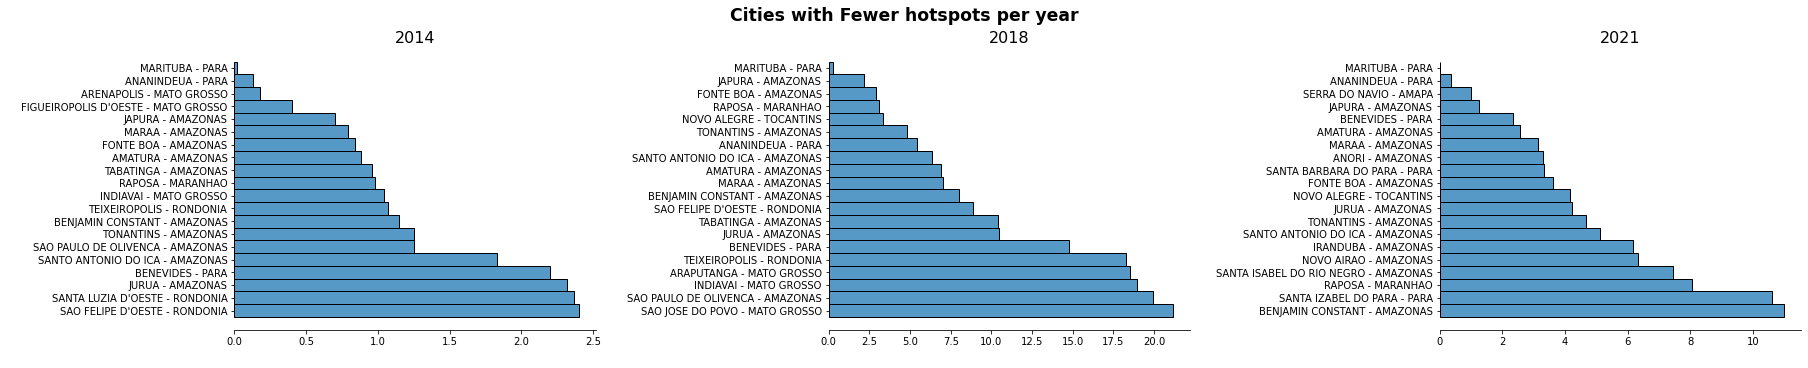

In [5]:
plot_top_hotspot(dataset, how_many=20, ascending=True)

#### List of maijors hotspot cities

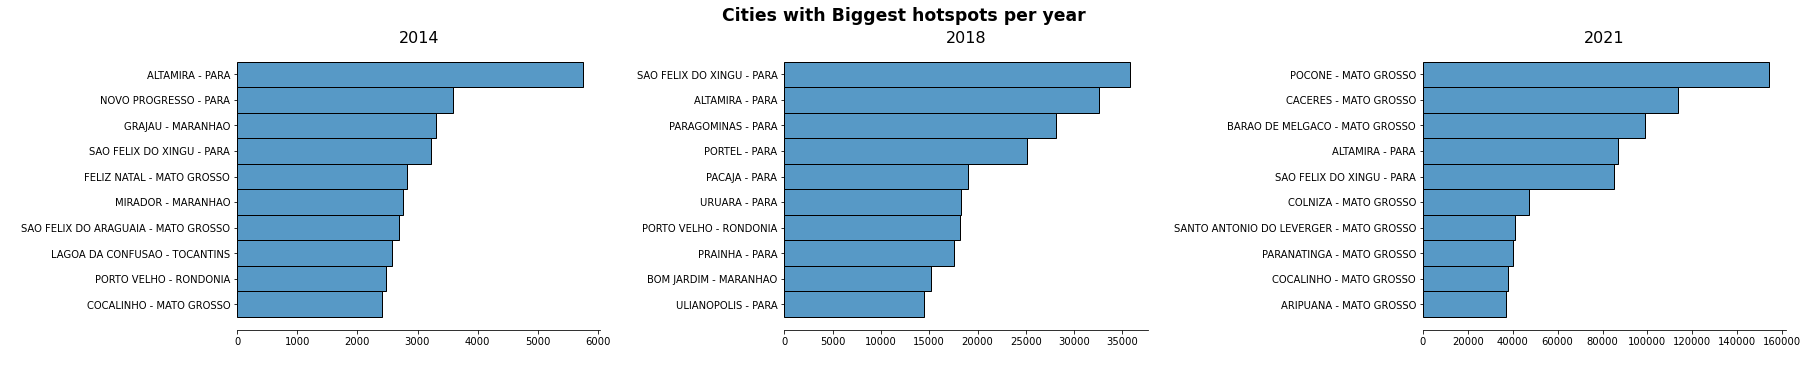

In [6]:
plot_top_hotspot(dataset, how_many=10, ascending=False)

### Correlation Matrix plots

In [7]:
def plot_corr_matrix(corr):
    fig, ax = plt.subplots(figsize=(10,10))  
    ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    );

#### Dimensions

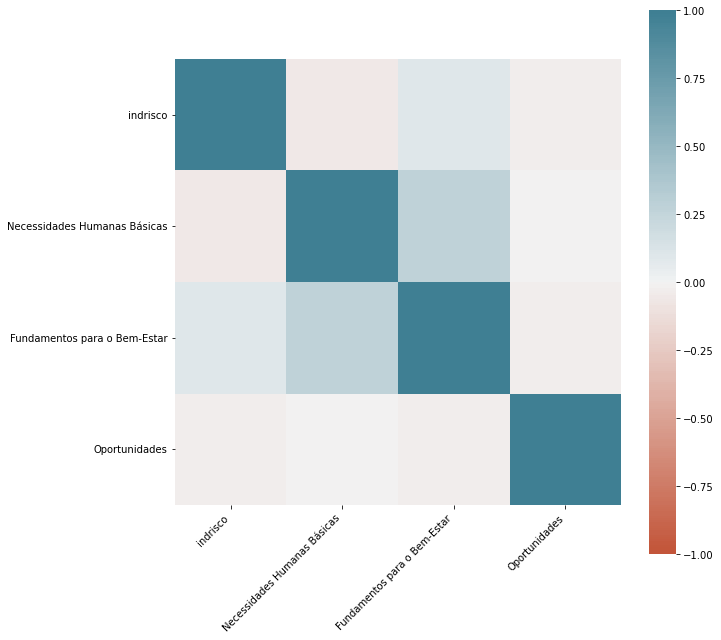

In [8]:
columns=["indrisco", "Necessidades Humanas Básicas", "Fundamentos para o Bem-Estar", "Oportunidades"]
subset = dataset[columns]

plot_corr_matrix(subset.corr())

#### Components

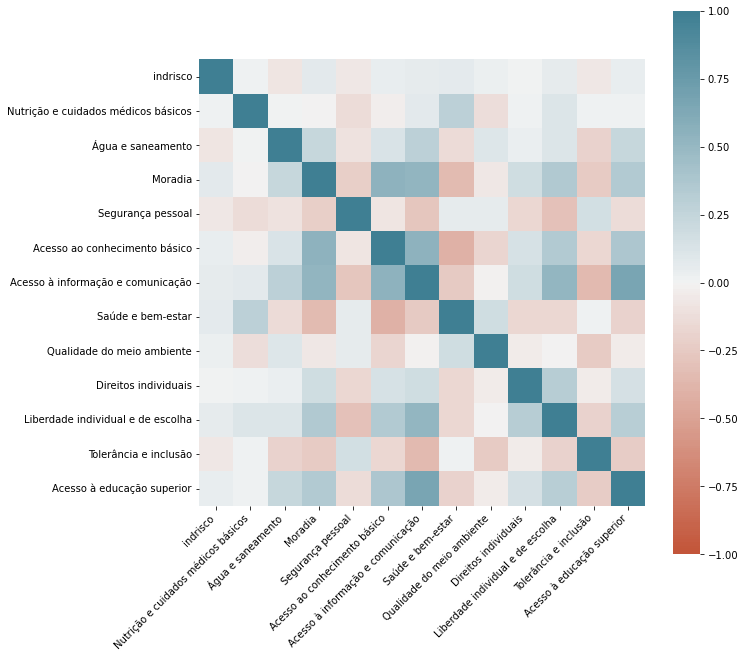

In [9]:
columns=[
    "indrisco",
    "Nutrição e cuidados médicos básicos", "Água e saneamento","Moradia","Segurança pessoal",
    "Acesso ao conhecimento básico", "Acesso à informação e comunicação", "Saúde e bem-estar", "Qualidade do meio ambiente",
    "Direitos individuais", "Liberdade individual e de escolha", "Tolerância e inclusão", "Acesso à educação superior"
]
subset = dataset[columns]
plot_corr_matrix(subset.corr())

#### Indicators - Água e saneamento

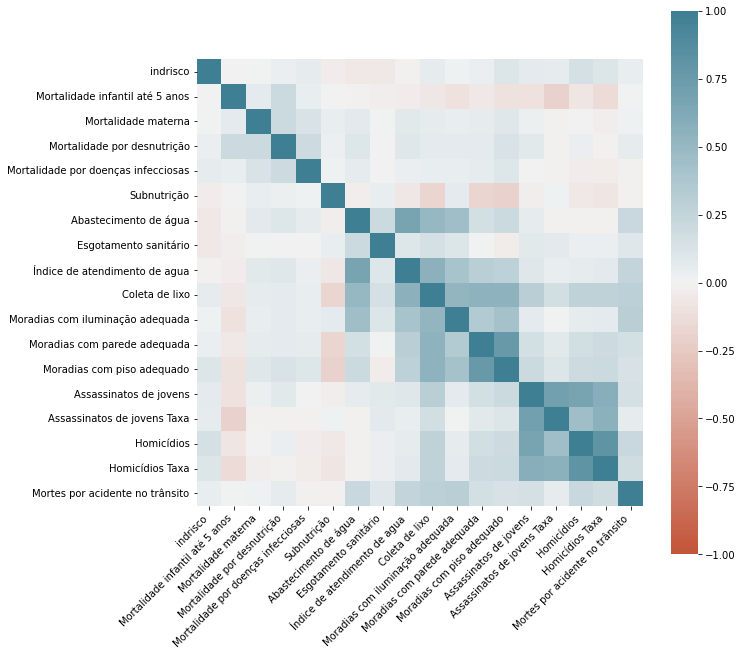

In [10]:
columns=[
    "indrisco",
    "Mortalidade infantil até 5 anos", "Mortalidade materna", "Mortalidade por desnutrição", "Mortalidade por doenças infecciosas", "Subnutrição", 
    "Abastecimento de água", "Esgotamento sanitário", "Índice de atendimento de agua",
    "Coleta de lixo", "Moradias com iluminação adequada", "Moradias com parede adequada", "Moradias com piso adequado",
    "Assassinatos de jovens", "Assassinatos de jovens Taxa", "Homicídios", "Homicídios Taxa", "Mortes por acidente no trânsito",
]
subset = dataset[columns]
plot_corr_matrix(subset.corr())